# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [18]:
for x in df.columns:
    df = df.rename(columns={x : x.lower()})
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

## Change the Index to be the Line Names

In [19]:
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the index back

In [20]:
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [25]:
df['Num_Lines'] = df.linename.map(lambda x: len(x))
df.sort_values(by='Num_Lines', ascending=False, inplace = True)
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
132255,1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,08/31/2018,04:00:00,REGULAR,68217145,17201834,12
132253,1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,08/30/2018,20:00:00,REGULAR,68216902,17201755,12
132414,1237ACENQRSW,R151,R033,00-00-03,TIMES SQ-42 ST,IRT,08/28/2018,11:29:43,REGULAR,6291546,8895428,12
132412,1237ACENQRSW,R151,R033,00-00-03,TIMES SQ-42 ST,IRT,08/28/2018,08:00:00,REGULAR,6291234,8894593,12


## Write a function to clean a column name

In [26]:
def clean(col_name):
    cleaned = col_name.strip()
    return cleaned

In [27]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns]

In [28]:
# Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

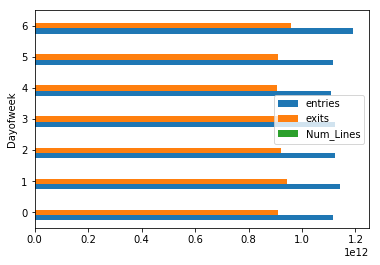

In [40]:
# Your code here
df.date = pd.to_datetime(df.date)
df['Dayofweek'] = df.date.dt.dayofweek
x = df.groupby('Dayofweek').sum()
x.plot(kind='barh')

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

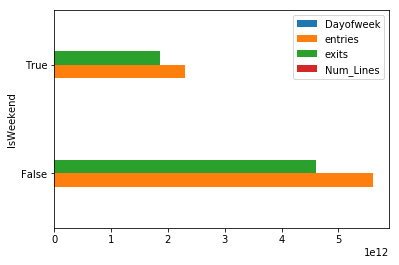

In [41]:
#Your code here
x = x.reset_index()
x.head()
x['IsWeekend'] = x.Dayofweek.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
x = x.groupby('IsWeekend').sum()
x.plot(kind='barh')

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
#As this is taken over a period of time, in order to get meaningful results,
#you need to first order by time and place.

## Drop a couple of columns

In [43]:
df.drop(['c/a', 'scp'], axis=1, inplace=True)
df.head()

,linename,unit,station,division,date,time,desc,entries,exits,Num_Lines,Dayofweek
132292,1237ACENQRSW,R033,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,3
132255,1237ACENQRSW,R033,TIMES SQ-42 ST,IRT,2018-08-31,04:00:00,REGULAR,68217145,17201834,12,4
132253,1237ACENQRSW,R033,TIMES SQ-42 ST,IRT,2018-08-30,20:00:00,REGULAR,68216902,17201755,12,3
132414,1237ACENQRSW,R033,TIMES SQ-42 ST,IRT,2018-08-28,11:29:43,REGULAR,6291546,8895428,12,1
132412,1237ACENQRSW,R033,TIMES SQ-42 ST,IRT,2018-08-28,08:00:00,REGULAR,6291234,8894593,12,1


## Summary

Great! You practiced your data cleanup-skills using Pandas.